In [33]:
#get_ipython().system('pip install spacy')

In [5]:
#get_ipython().system('pip install wordcloud')

In [35]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [36]:
musk=pd.read_csv("Elon_musk.csv", sep=',', encoding='latin-1')
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [37]:
train,test = train_test_split(musk,test_size=0.1)

In [38]:
train

,Unnamed: 0,Text
868,869,@WholeMarsBlog Accurate
692,693,"Thrusters are integrated with spacecraft, enab..."
1773,1774,https://t.co/Ufay65lZJj
638,639,"@teslaownerssv @AstroJordy @flcnhvy No, just a..."
874,875,@waitbutwhy <U+0001F609>
...,...,...
1184,1185,RT @SpaceX: Falcon 9 will launch @NASAs super...
1077,1078,@WholeMarsBlog I do so wish that more companie...
1197,1198,@PPathole @Erdayastronaut There are some pract...
1387,1388,@flcnhvy @GerberKawasaki Alexander and the Ris...


In [39]:
test

,Unnamed: 0,Text
1879,1880,Launch in 20 mins https://t.co/1oLtPnW929
1210,1211,@xiang_aw @WholeMarsBlog This does seem like t...
1552,1553,@tbdnonymous Yes. Probably more accurate to sa...
922,923,@SpaceX Just a small-seeming issue with loss o...
566,567,"This is a life leader launch, so more risk tha..."
...,...,...
1516,1517,Fairing chute control &amp; ship control are c...
491,492,RT @Pockn_CG: Can't wait!! @elonmusk #spacex #...
666,667,@Erdayastronaut @rweb11742 The most amazing th...
1305,1306,SN8 Starship with flaps &amp; nosecone should ...


In [40]:
import re

In [41]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [42]:
musk["Text"] = musk["Text"].apply(cleantext)

musk.head()


,Unnamed: 0,Text
0,1,Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [43]:
#!python -m spacy download en_core_web_md

In [44]:
spacy.load('en_core_web_md')

In [45]:
from textblob import TextBlob

In [46]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [47]:
musk[["subjectivity", "polarity"]] = musk.apply(sentiment_analysis, axis=1)
musk

,Unnamed: 0,Text,subjectivity,polarity
0,1,Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


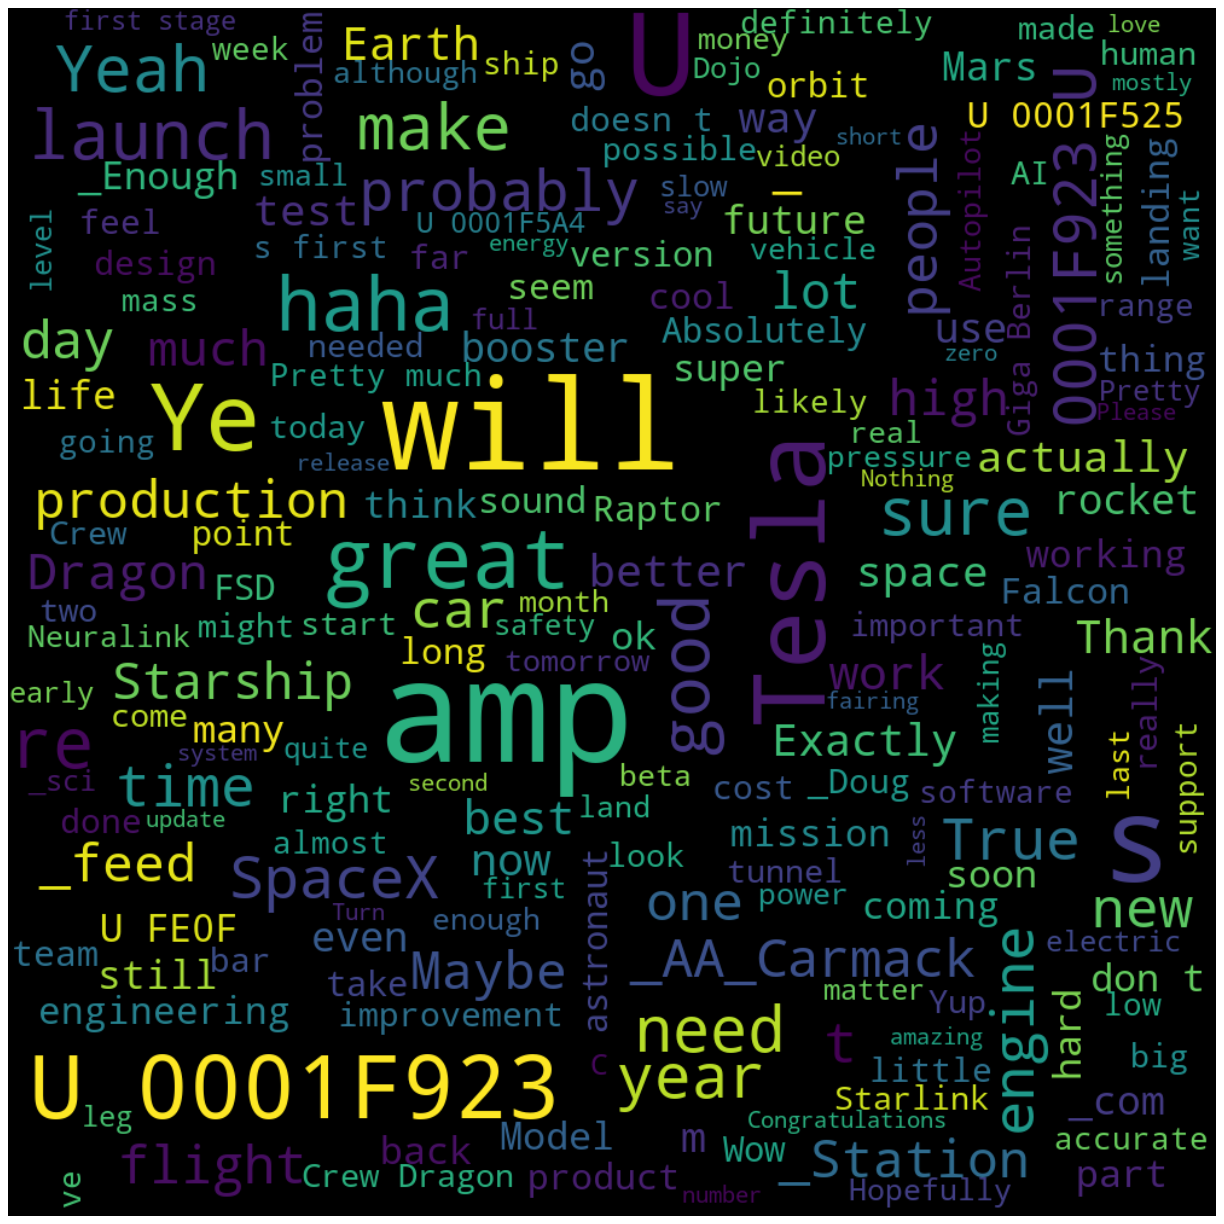

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in musk["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [49]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [50]:
musk["analysis"] = musk["polarity"].apply(analysis)


In [51]:
musk

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [52]:
positive_tweets = musk[musk['analysis'] == 'Positive']
negative_tweets = musk[musk['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


In [53]:
musk = musk[['Text','analysis']]
musk

,Text,analysis
0,Im an alien,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
2,Great interview!,Positive
3,Doge is underestimated,Neutral
4,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive
1996,Samwise Gamgee,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [54]:
musk = musk [musk ['analysis']!= 'Neutral']
musk

,Text,analysis
0,Im an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [55]:
musk.shape

(1103, 2)

In [56]:
musk.dtypes

Text        object
analysis    object
dtype: object

In [57]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1103 non-null   object
 1   analysis  1103 non-null   object
dtypes: object(2)
memory usage: 25.9+ KB


In [58]:
train,test = train_test_split(musk,test_size=0.1)

In [59]:
train

,Text,analysis
1259,Irrational is such a funny word to describe n...,Positive
652,"Its designed to make life multiplanetary, ot...",Negative
1312,"Releasing private beta in 2 to 4 weeks, publ...",Positive
279,Probably commenting on will do more,Positive
1419,Raptor reached 230 mT-F (over half a millio...,Negative
...,...,...
1784,Has to be blue steel :),Positive
87,We were too dumb,Negative
1630,Good analysis. He also includes a govt loan ...,Positive
1756,Sounds great,Positive


In [60]:
test

,Text,analysis
1302,@_rykllan Thats the number that really m...,Positive
812,420 is ten times better than 42,Positive
1586,More software improvements coming,Positive
184,"Yes, although it will be crazy not to turn ...",Negative
747,Interesting,Positive
...,...,...
1938,Ok,Positive
1252,Therell be lots of green space around factor...,Negative
242,Probably wise,Positive
336,_ai Tesla Full Self-Driving will work at a saf...,Positive


In [61]:
for val in train['Text']:
    print (val)

 Irrational is such a funny word to describe numbers
 Its designed to make life multiplanetary, otherwise extreme overkill for mere Earth sector activity! 
  Releasing private beta in 2 to 4 weeks, public beta (early access owners who opt in 
  Probably commenting on  will do more
   Raptor reached 230 mT-F (over half a million pounds of thrust) at peak pressure wit 
  All correct. Parachutes were originally the backup landing system, with SuperDraco thruster 
  It took an utterly insane amount of work to move the SpaceX &amp; Tesla success probabilities above ~zero
 It will blow ur mind haha 
 Thanks to a great Autopilot/AI team working super hard! 

Doing neural nets without testing them again 
  Fallout New Texas
  Sure hope that future doesnt come to pass!
_heide  What about a heavy duty, paintball machine gun mounted on the bed rails?
_feed [slow drag on cigarette) Facebook? Havent heard that name in years 
 Just a small-seeming issue with loss of upper stage camera. Pr

In [62]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [63]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [64]:
train['Text']


1259     Irrational is such a funny word to describe n...
652      Its designed to make life multiplanetary, ot...
1312      Releasing private beta in 2 to 4 weeks, publ...
279                  Probably commenting on  will do more
1419       Raptor reached 230 mT-F (over half a millio...
                              ...                        
1784                              Has to be blue steel :)
87                                       We were too dumb
1630      Good analysis. He also includes a govt loan ...
1756                                         Sounds great
932           Starship nosecone, high bay &amp; tiki bar 
Name: Text, Length: 992, dtype: object

In [65]:
def Clean_Text(musk):
    Text = []
    analysis = []
    for index,row in musk.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/smit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/smit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
train_Text,train_analysis = Clean_Text(train)

In [69]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['irrational funny word describe number',
  'it\x92s designed make life multiplanetary, otherwise extreme overkill mere earth sector activity!',
  'releasing private beta 2 4 weeks, public beta (early access owner opt',
  'probably commenting',
  'raptor reached 230 mt-f (over half million pound thrust) peak pressure wit',
  'correct. parachute originally backup landing system, superdraco thruster',
  'took utterly insane amount work move spacex &amp; tesla success probability ~zero',
  'blow ur mind haha',
  'thanks great autopilot/ai team working super hard! \x93neural nets\x94 without testing',
  'fallout new texas',
  'sure hope future doesn\x92t come pass!',
  '_heide heavy duty, paintball machine gun mounted bed rails?',
  '_feed [slow drag cigarette) facebook? haven\x92t heard name year',
  'small-seeming issue loss upper stage camera. probably nothing serious, standing',
  '<u+0001f339> twitter suck',
  'london beijing would cool',
  '_energy _plasma it\x92s cool &am

In [70]:
processed_data = pd.DataFrame(final_data)

In [71]:
processed_data

,tweets,sentiments
0,irrational funny word describe number,Positive
1,"its designed make life multiplanetary, otherw...",Negative
2,"releasing private beta 2 4 weeks, public beta ...",Positive
3,probably commenting,Positive
4,raptor reached 230 mt-f (over half million pou...,Negative
...,...,...
987,blue steel :),Positive
988,dumb,Negative
989,good analysis. also includes govt loan high ef...,Positive
990,sound great,Positive


In [72]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [73]:
processed_data

,tweets,sentiments
0,irrational funny word describe number,1
1,"its designed make life multiplanetary, otherw...",0
2,"releasing private beta 2 4 weeks, public beta ...",1
3,probably commenting,1
4,raptor reached 230 mt-f (over half million pou...,0
...,...,...
987,blue steel :),1
988,dumb,0
989,good analysis. also includes govt loan high ef...,1
990,sound great,1


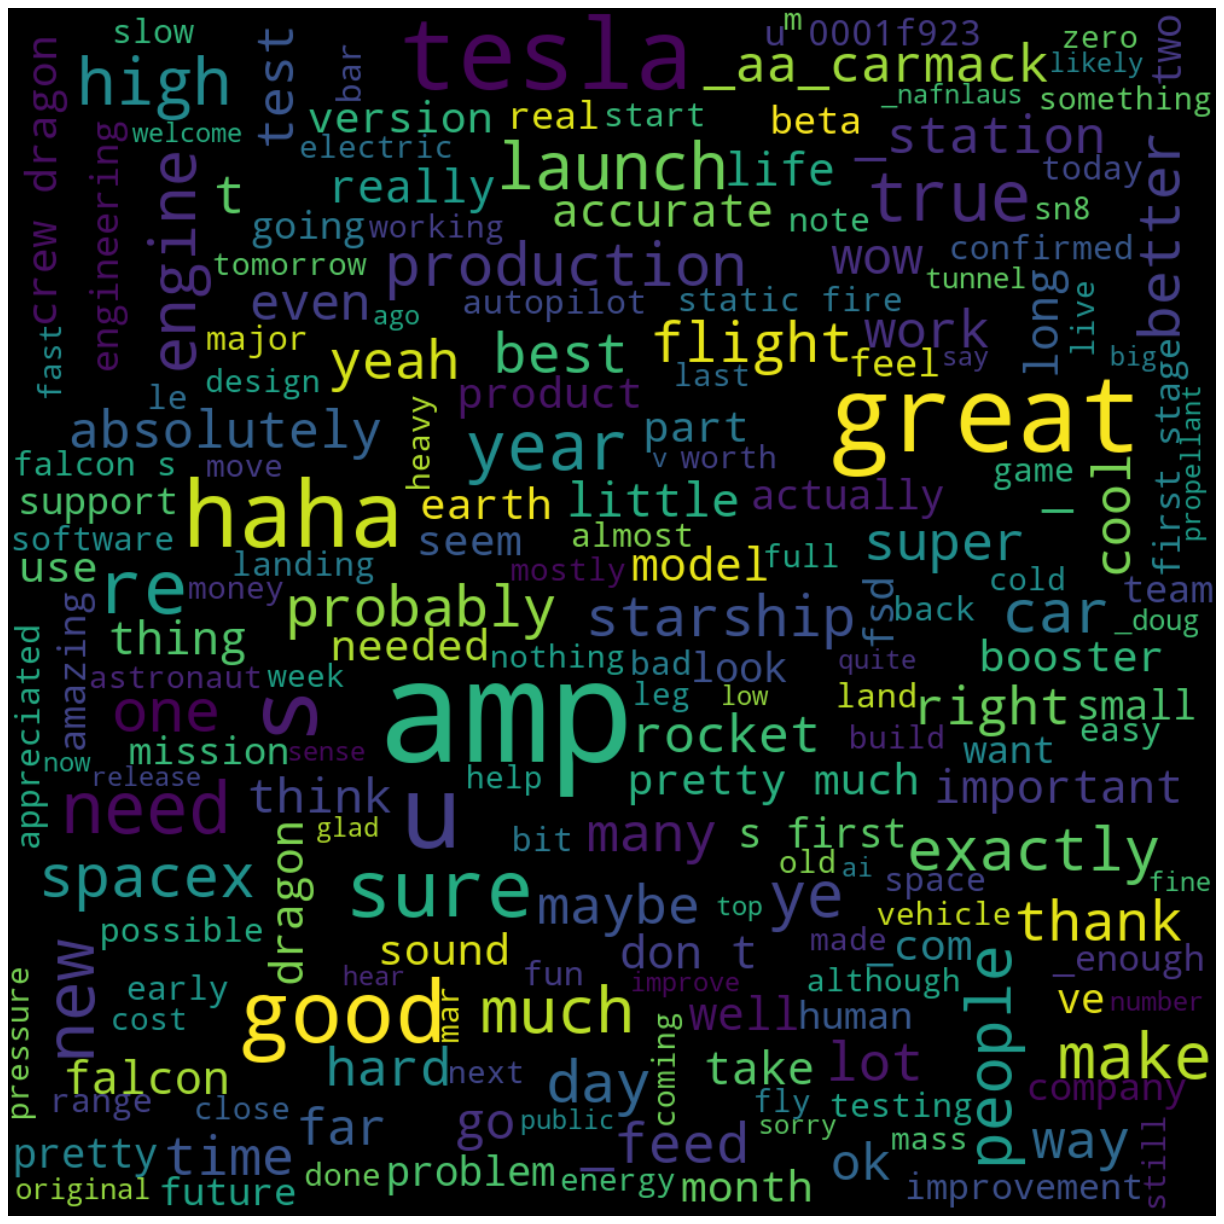

In [74]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

/Users/smit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

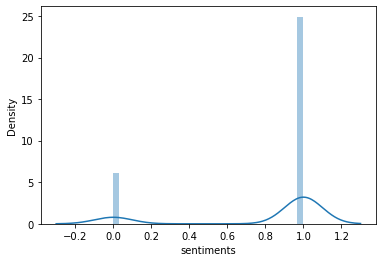

In [75]:
sns.distplot(processed_data['sentiments'])

/Users/smit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiments'>

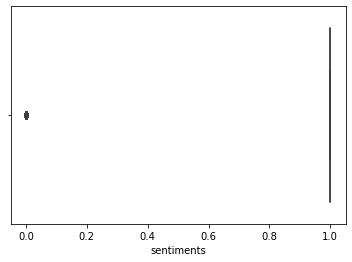

In [76]:
sns.boxplot(processed_data['sentiments'])

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [78]:
X_train = cv.transform(processed_data['tweets'])

In [79]:
print(X_train.shape)

(992, 13120)


In [80]:
X_train

<992x13120 sparse matrix of type '<class 'numpy.int64'>'
	with 17657 stored elements in Compressed Sparse Row format>

In [81]:
target = processed_data['sentiments'].values

In [82]:
target

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [84]:
classifier.fit(X_train,target)

MultinomialNB()

In [85]:
test_Text,test_analysis = Clean_Text(test)

In [86]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [87]:
final_test_data

,tweets,sentiments
0,thats number really matter,Positive
1,420 ten time better 42,Positive
2,software improvement coming,Positive
3,"yes, although crazy turn fsd",Negative
4,interesting,Positive
...,...,...
106,ok,Positive
107,"therell lot green space around factory, build...",Negative
108,probably wise,Positive
109,_ai tesla full self-driving work safety level ...,Positive


In [88]:
X_test = cv.transform(final_test_data['tweets'])

In [89]:
X_test

<111x13120 sparse matrix of type '<class 'numpy.int64'>'
	with 722 stored elements in Compressed Sparse Row format>

In [90]:
X_test.shape

(111, 13120)

In [91]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [92]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [93]:
final_test_data

,tweets,sentiments
0,thats number really matter,1
1,420 ten time better 42,1
2,software improvement coming,1
3,"yes, although crazy turn fsd",0
4,interesting,1
...,...,...
106,ok,1
107,"therell lot green space around factory, build...",0
108,probably wise,1
109,_ai tesla full self-driving work safety level ...,1


In [94]:
actual_values = final_test_data['sentiments'].values

In [95]:
actual_values


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1])

In [96]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.7927927927927928
